In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [92]:
df = pd.read_csv("TSLA.csv")
df['Date'] = pd.to_datetime(df['Date'])

df = df.sort_values('Date')

In [93]:
# 20 day historical volatilty
df['HIST_VOL_20'] = df['Log_Returns'].rolling(20).std()

# 50 day
df['HIST_VOL_50'] = df['Log_Returns'].rolling(50).std()

# 100 day
df['HIST_VOL_100'] = df['Log_Returns'].rolling(100).std()

Plot the volatility


In [94]:
df['HIST_VOL_20'].idxmax() # Maximum volatility for 20 rolling window

215

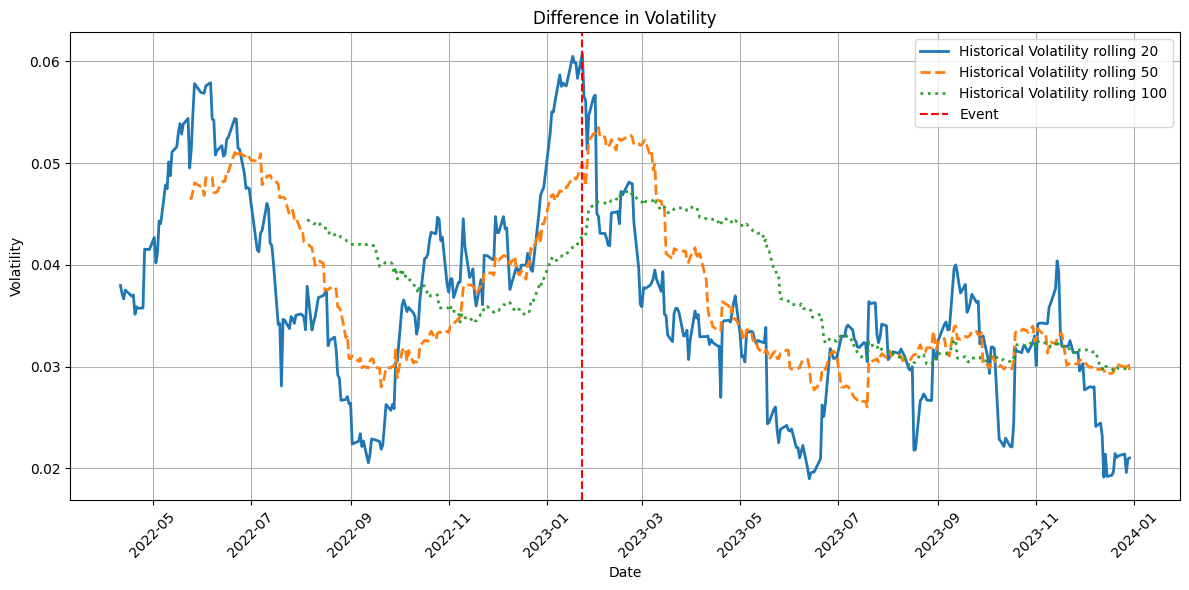

In [95]:
spike_date = '2023-01-23'


plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['HIST_VOL_20'], label='Historical Volatility rolling 20', linewidth=2)
plt.plot(df['Date'], df['HIST_VOL_50'], label='Historical Volatility rolling 50', linestyle='--', linewidth=2)
plt.plot(df['Date'], df['HIST_VOL_100'], label='Historical Volatility rolling 100', linestyle=':', linewidth=2)
plt.axvline(pd.to_datetime(spike_date), color='red', linestyle='--', label='Event')
plt.title('Difference in Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

In [96]:
# Print out the highest and lowest 10 values of each volatility and their corresponding dates to look up market events
vol_20_cols = ['HIST_VOL_20', 'Date']
vol_50_cols = ['HIST_VOL_50', 'Date']
vol_100_cols = ['HIST_VOL_100', 'Date']

vol_20_df = df[vol_20_cols]
vol_50_df = df[vol_50_cols]
vol_100_df = df[vol_100_cols]

In [97]:
# For vol 20
print("Highest 10 values of HIST_VOL_20 and the dates \n",vol_20_df.sort_values('HIST_VOL_20', ascending=False).head(5))
print("Lowest 10 values of HIST_VOL_20 and the dates \n",vol_20_df.sort_values('HIST_VOL_20', ascending=True).head(5))


Highest 10 values of HIST_VOL_20 and the dates 
      HIST_VOL_20       Date
215     0.060764 2023-01-23
211     0.060498 2023-01-17
212     0.059868 2023-01-18
213     0.059864 2023-01-19
206     0.058675 2023-01-09
Lowest 10 values of HIST_VOL_20 and the dates 
      HIST_VOL_20       Date
313     0.018977 2023-06-13
440     0.019139 2023-12-13
442     0.019201 2023-12-15
443     0.019323 2023-12-18
314     0.019557 2023-06-14


In [98]:
# For vol 50
print("Highest 10 values of HIST_VOL_50 and the dates \n",vol_50_df.sort_values('HIST_VOL_50', ascending=False).head(5))
print("Lowest 10 values of HIST_VOL_50 and the dates \n",vol_50_df.sort_values('HIST_VOL_50', ascending=True).head(5))


Highest 10 values of HIST_VOL_50 and the dates 
      HIST_VOL_50       Date
223     0.053514 2023-02-02
222     0.053309 2023-02-01
221     0.052956 2023-01-31
220     0.052898 2023-01-30
236     0.052731 2023-02-22
Lowest 10 values of HIST_VOL_50 and the dates 
      HIST_VOL_50       Date
337     0.026029 2023-07-19
334     0.026493 2023-07-14
336     0.026585 2023-07-18
335     0.026610 2023-07-17
333     0.026653 2023-07-13


In [99]:
# For vol 100
print("Highest 10 values of HIST_VOL_100 and the dates \n",vol_100_df.sort_values('HIST_VOL_100', ascending=False).head(5))
print("Lowest 10 values of HIST_VOL_100 and the dates \n",vol_100_df.sort_values('HIST_VOL_100', ascending=True).head(5))

Highest 10 values of HIST_VOL_100 and the dates 
      HIST_VOL_100       Date
236      0.047267 2023-02-22
235      0.047265 2023-02-21
234      0.047073 2023-02-17
233      0.046956 2023-02-16
231      0.046910 2023-02-14
Lowest 10 values of HIST_VOL_100 and the dates 
      HIST_VOL_100       Date
444      0.029617 2023-12-19
440      0.029625 2023-12-13
449      0.029776 2023-12-27
448      0.029795 2023-12-26
438      0.029815 2023-12-11


GARCH Model implementation using arch library

In [100]:
from arch import arch_model

returns = df['Log_Returns'].dropna()
returns_scaled = returns * 100

In [101]:
garch_model = arch_model(returns_scaled, vol='GARCH', p=1, q=1, mean='Constant', dist='normal')
garch_fit = garch_model.fit(disp='off')
garch_cond_vol = garch_fit.conditional_volatility / 100


print(garch_fit.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:            Log_Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1231.97
Distribution:                  Normal   AIC:                           2471.94
Method:            Maximum Likelihood   BIC:                           2488.39
                                        No. Observations:                  452
Date:                Wed, Nov 12 2025   Df Residuals:                      451
Time:                        20:50:15   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.0198      0.171      0.116      0.908 [ -0.315,  0.35

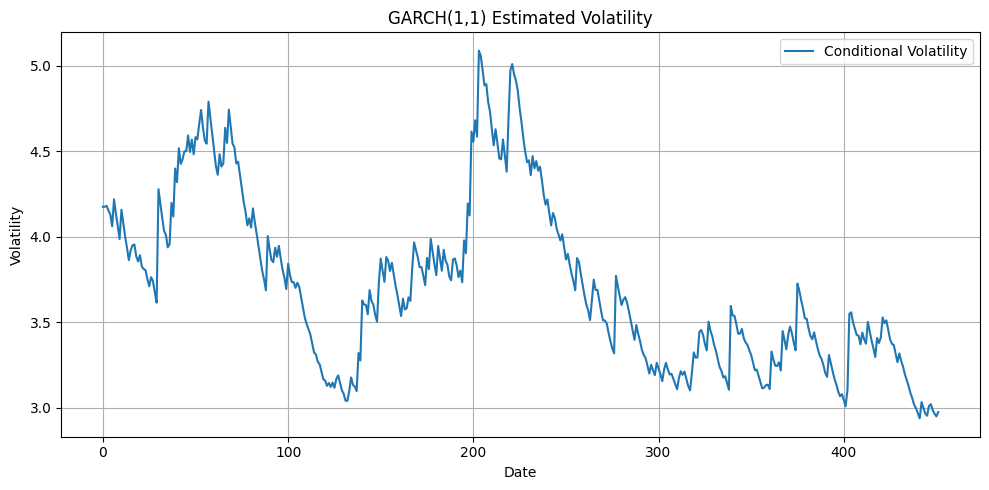

In [102]:
# Plot conditional volatility

plt.figure(figsize=(10, 5))
plt.plot(garch_fit.conditional_volatility, label='Conditional Volatility')
plt.title('GARCH(1,1) Estimated Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

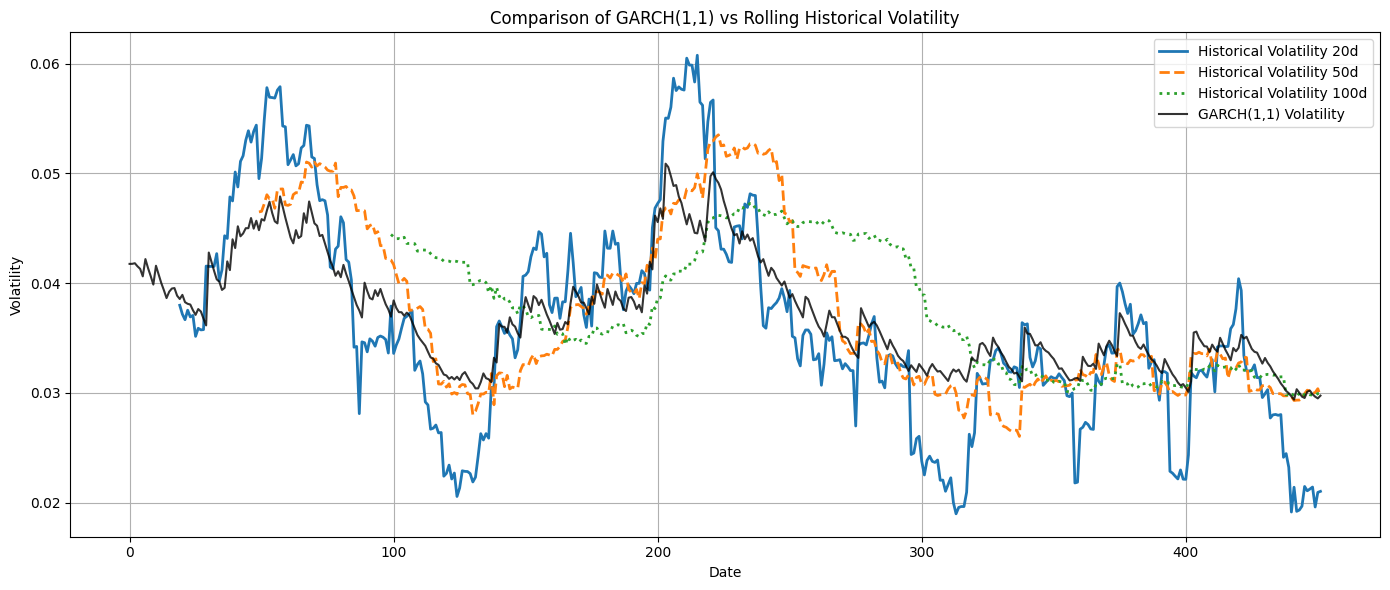

In [103]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(df.index, df['HIST_VOL_20'], label='Historical Volatility 20d', linewidth=2)
plt.plot(df.index, df['HIST_VOL_50'], label='Historical Volatility 50d', linestyle='--', linewidth=2)
plt.plot(df.index, df['HIST_VOL_100'], label='Historical Volatility 100d', linestyle=':', linewidth=2)
plt.plot(df.index, garch_cond_vol, label='GARCH(1,1) Volatility', color='black', alpha=0.8)

plt.title('Comparison of GARCH(1,1) vs Rolling Historical Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
